<a href="https://colab.research.google.com/github/01DaisyLynn/KNN-NAIVEBAYES/blob/main/Naive_Bayes___IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAIVE BAYES CLASSIFIER**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predict whether mail is spam or not

### b) Defining the Metric for Success

Model will be considered a success if it achieves more than 85%accuracy, the higher the accuracy the better

The very least accuracy should be 80%

### c) Understanding the context 

Dataset contains variables that help distinguish if mail should be labeled as spam or not

The last column of 'spam' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

### d) Recording the Experimental Design

1.  Reading data 
2.  Checking data for errors
3.  Tidying dataset
4.  Performing Exploratory Data Analysis
5.  Perfoming predictions



## 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/spambase.data")



## 3. Checking the Data

In [3]:
# Determining the shape of dataset
data.shape

#there are 4600 rows and 58 columns

(4600, 58)

In [4]:
# Previewing the top of our dataset
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# Previewing the bottom of our dataset
data.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


From above results notice there aren't any column names, we're going to add them manually

We will use a separate file(document) that contains the column names

In [6]:
data = data.set_axis(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 
'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 
'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 
'capital_run_length_longest', 'capital_run_length_total', 'spam'], axis=1)

In [7]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [8]:
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


Column names have been successfully added

In [9]:
# Checking datatype
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [10]:
#checking for unique values
data['word_freq_make'].unique()

array([0.21, 0.06, 0.  , 0.15, 0.05, 1.17, 0.3 , 0.18, 0.49, 0.46, 0.73,
       0.23, 0.12, 0.66, 0.75, 0.47, 0.59, 1.24, 0.5 , 0.16, 0.41, 1.  ,
       0.36, 0.39, 0.67, 0.42, 0.14, 0.62, 0.52, 0.17, 0.44, 0.34, 0.43,
       2.12, 0.54, 0.53, 0.51, 0.45, 0.22, 0.07, 1.03, 0.26, 0.19, 0.84,
       0.08, 0.48, 0.8 , 0.58, 0.25, 0.4 , 0.1 , 1.63, 0.35, 0.64, 0.63,
       0.65, 0.2 , 0.6 , 0.76, 0.11, 1.05, 0.29, 0.33, 0.27, 0.31, 0.09,
       0.32, 0.57, 0.9 , 0.28, 0.56, 2.43, 1.18, 0.13, 2.32, 0.68, 0.79,
       1.26, 0.89, 0.7 , 0.82, 0.87, 0.24, 0.95, 0.93, 0.98, 1.01, 0.72,
       0.71, 1.23, 2.35, 0.78, 0.38, 0.74, 1.36, 1.47, 0.69, 1.06, 1.61,
       1.04, 0.37, 1.19, 1.44, 0.61, 0.86, 0.77, 0.99, 0.85, 4.54, 0.96,
       0.02, 1.14, 0.81, 1.02, 1.11, 2.77, 0.01, 2.  , 0.04, 0.03, 1.09,
       0.97, 1.16, 2.27, 1.07, 3.94, 1.75, 3.03, 0.83, 0.55, 1.12, 2.85,
       3.84, 1.31, 1.08, 1.49, 4.  , 1.39, 4.34, 1.42, 1.88, 0.88])

In [11]:
#checking for unique values
data['word_freq_credit'].unique()


array([0.000e+00, 3.200e-01, 3.530e+00, 6.000e-02, 4.200e-01, 1.000e-01,
       5.220e+00, 2.080e+00, 2.400e-01, 2.190e+00, 2.200e+00, 4.800e-01,
       1.260e+00, 6.900e-01, 4.600e-01, 1.300e-01, 2.500e-01, 3.000e-01,
       1.280e+00, 1.600e-01, 1.680e+00, 1.400e-01, 1.350e+00, 1.310e+00,
       1.500e-01, 1.818e+01, 3.500e-01, 2.640e+00, 1.970e+00, 1.700e-01,
       1.800e-01, 1.160e+00, 1.900e-01, 1.810e+00, 9.300e-01, 1.610e+00,
       1.050e+00, 2.820e+00, 3.800e-01, 2.000e-01, 2.300e-01, 2.900e-01,
       8.900e-01, 1.200e-01, 2.310e+00, 2.140e+00, 2.260e+00, 3.420e+00,
       9.000e-02, 5.500e-01, 3.090e+00, 4.900e-01, 4.100e+00, 4.260e+00,
       4.000e-01, 3.100e-01, 1.650e+00, 1.980e+00, 6.320e+00, 5.330e+00,
       3.900e-01, 4.760e+00, 7.600e-01, 1.550e+00, 6.800e-01, 1.100e+00,
       5.000e-01, 2.610e+00, 3.180e+00, 1.470e+00, 1.000e+00, 9.200e-01,
       2.600e-01, 1.020e+00, 8.000e-02, 5.300e-01, 4.100e-01, 7.400e-01,
       4.700e-01, 9.900e-01, 9.800e-01, 3.400e-01, 

## 4. Tidying the Dataset

In [14]:
#checking for duplicates
data.duplicated().sum()

391

There is presence of duplicates

In [15]:
# lets drop the duplicates
data = data.drop_duplicates()

data.duplicated().sum()

0

Duplicates have been removed

In [16]:
data.shape     #new shape 4209 rows 58 columns

(4209, 58)

In [17]:
# Identifying the Missing Data
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no missing values

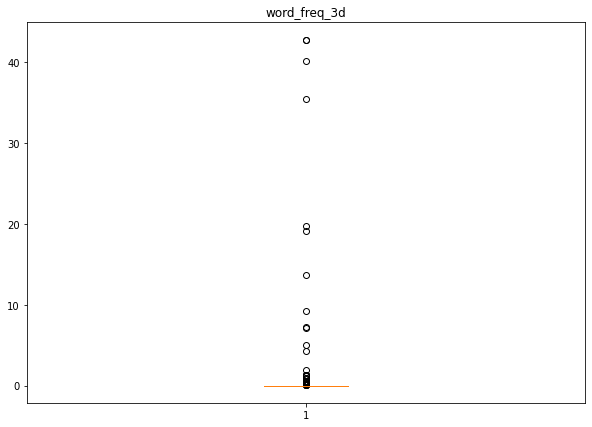

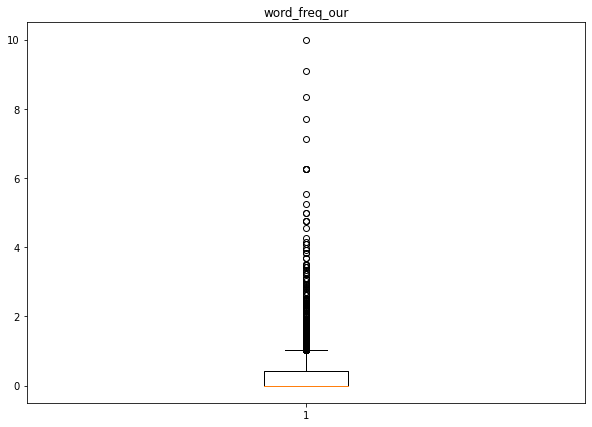

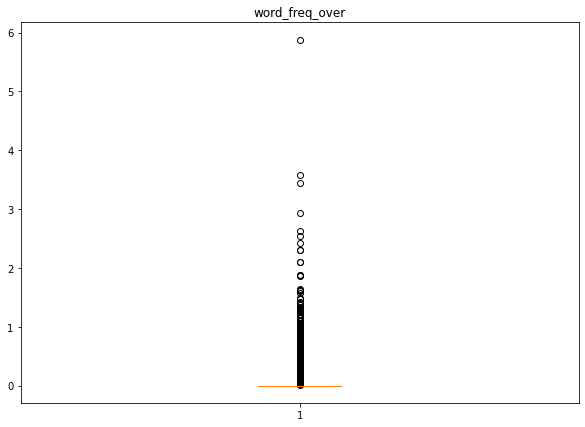

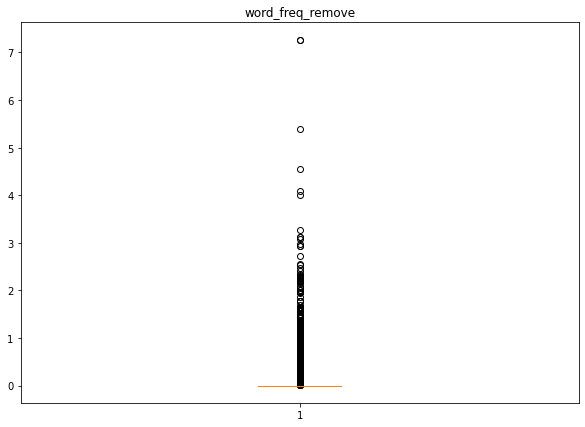

In [18]:
# Checking for Outliers in some of the columns(randomly picked)
col=['word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

Presence of outliers

## EXPLORATORY DATA ANALYSIS

### Univariate

In [19]:
#getting numerical estimates for our columns
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

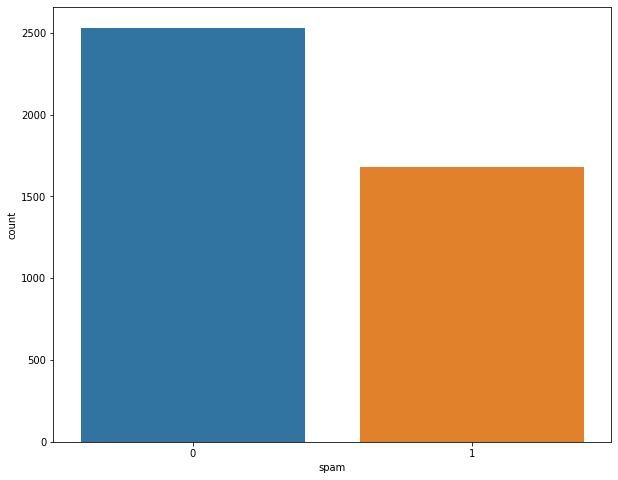

In [20]:
#finding out whether most of the mails are spam or not
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='spam')
plt.show()

0 = not spam, 1 = spam most of the mails were'nt spam

### Bivariate

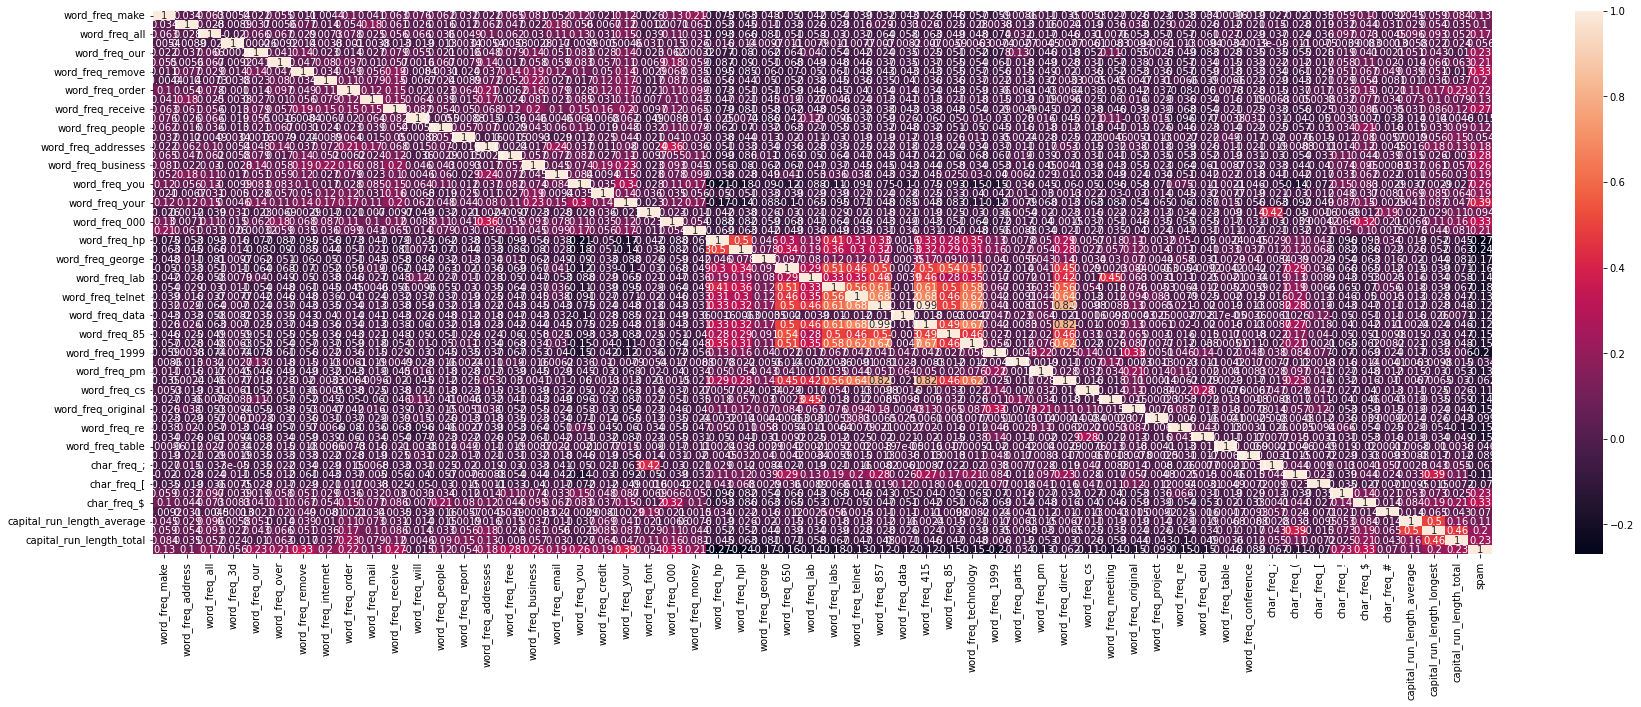

In [22]:
#correlation using a heatmap
fig,ax = plt.subplots(figsize=(30, 10))
sns.heatmap(data.corr(),annot=True)
plt.show()

there are too many columns to clearly tell the correlation through visualization

In [23]:
#using a table to see the correlations
correlations = data.corr()

correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.05

In [25]:
# we will check the VIF score to see if their are highly correlated variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif["Features"] = data.columns
vif

,vif,Features
0,1.229479,word_freq_make
1,1.173693,word_freq_address
2,1.412062,word_freq_all
3,1.010556,word_freq_3d
4,1.375990,word_freq_our
5,1.210145,word_freq_over
6,1.298680,word_freq_remove
7,1.191505,word_freq_internet
8,1.320210,word_freq_order
9,1.276496,word_freq_mail


from above vif table notice word_freq_857 and word_freq_415 have a very high VIF score of more than a 100 ! 

we'll drop these columns

In [30]:
#dropping highly correlated variables
data = data.drop(['word_freq_857', 'word_freq_415'], axis=1)

In [35]:
data.head(2)
# variables have been dropped

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


## Modeling

### Using 80 - 20 split

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer

In [71]:
# Splitting independent and dependant variables 
X = data.loc[:, 'word_freq_make' : 'capital_run_length_total'].values
y = data['spam'].values

In [72]:
#splitting to train and test 80-20

X_train,X_test, Y_train,Y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [73]:
#fitting
model1 = MultinomialNB().fit(X_train, Y_train)

In [74]:
#making prediction
y_pred = model1.predict(X_test)

In [75]:
#finding accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(Y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y_test, y_pred))

Accuracy of our 80-20 model is :  0.7897862232779097

*************************************************

Confusion matrix :  [[422  73]
 [104 243]]


The accuracy for the first model using 80% as the training set and 20% as a test set is 78.9%

### Using 70 - 30 split

In [43]:
#splitting to train and test 70-30

X2_train,X2_test, Y2_train,Y2_test= train_test_split(X,y, test_size = 0.3, random_state=0)

In [44]:
#fitting
model2 = MultinomialNB().fit(X_train, Y_train)

In [45]:
#Making predictions
y_pred2 = model2.predict(X2_test)

In [46]:
#getting Accuracy, Confusion matrix
print('Accuracy of our 70-30 model is : ', accuracy_score(Y2_test, y_pred2))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y2_test, y_pred2))

Accuracy of our 70-30 model is :  0.7885985748218527

*************************************************

Confusion matrix :  [[637 100]
 [167 359]]


The accuracy for the second model using 70% as the training set and 30% as a test set is 78.8%

### Using 60 - 40 Split

In [47]:
#splitting to train and test 60-40

X3_train,X3_test, Y3_train,Y3_test= train_test_split(X,y, test_size = 0.4, random_state=0)

In [50]:
#fitting
model3 = MultinomialNB().fit(X_train, Y_train)

In [52]:
#Making predictions
y_pred3 = model3.predict(X3_test)

In [53]:
#getting Accuracy, Confusion matrix and classification report
print('Accuracy of our 60-40 model is : ', accuracy_score(Y3_test, y_pred3))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y3_test, y_pred3))

Accuracy of our 60-40 model is :  0.7820665083135392

*************************************************

Confusion matrix :  [[849 145]
 [222 468]]


The accuracy for the third model using 60% as the training set and 40% as a test set is 78.2%

### Model Optimization

We will try to normalize our best model which is the first model(80 - 20 split) to see if the accuracy improves

In [70]:
# Attempt to normalize the values and perform Naive Bayes
scaler = Normalizer()

X1 = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

Accuracy of our 80-20 model is :  0.5914489311163895


The accuracy is waay lower than our first model so we'll stick to the first model which hasn't been normalized

## Conclusions and recommendations

Three models were used for the prediction

1. 80 - 20 split which had an accuracy of 78.9%
2. 70 - 30 split which had an accuracy of 78.8%
3. 60 - 40 split which had an accuracy of 78.2%

Model optimization was done by trying to normalize our best model the 80 - 20 split but the model performed way worse getting an accuracy score of 59% (yiiikes), thus normalization is discouraged

FOR PREDICTION: use the first model 80 - 20 split which wasn't been normalized,though it didn't reach our metric of success of 80% and higher but it was the closest model